![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [4]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
display(bikes)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
display(bikes)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [5]:
# Celda 1.1

bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


El resultado anterior muestra la media de alquiler de bicicletas concentrada por las estaciones de año. Si se tiene en cuenta que 1 es invierno, 2 es primavera, 3 es verano y 4 es otoño, se podria decir lo siguiente:

Season 1: El promedio de bicicletas alquiladas es aproximadamente 116.34, en invierno hay menos alquileres de bicicletas, es la mas baja de todas, el clima no permite mejores numeros en esta estación del año.

Season 2: El promedio de alquileres aumenta a 215.25, lo que  representa la primavera, esto indicaría que hay un aumento en los alquileres de bicicletas conforme el clima se vuelve más cálido.

Season 3: El promedio es aún mayor, alrededor de 234.42, lo que representa el verano. Esta es típicamente la estación con más alquileres, posiblemente debido a las condiciones climáticas favorables y a que es una época común para las vacaciones.

Season 4: Hay una disminución en el promedio de alquileres a 198.98, lo que representa el otoño, aunque sigue siendo relativamente alto, sugiere una disminución respecto al verano, posiblemente debido a que el clima comienza a enfriarse.

completando el analisis con otras estadisticas.

Season 1 (Invierno):

count: 2,686 registros.
std: La desviación estandar es de aproximadamente 125.27, lo que indica una variabilidad significativa en los alquileres
min: El mínimo es 1, lo que podría ser un día con condiciones climáticas muy desfavorables
25%: El percentil 25 es 24.0, mostrando que al menos el 25% de los días tiene 24 o menos alquileres
50%: La mediana es 78.0, lo que significa que la mitad de los días tiene menos de 78 alquileres.
75%: El percentil 75 es 164.0, por lo que el 75% de los días tiene menos de 164 alquileres.
max: El máximo es 801, lo que puede indicar días muy activos, posiblemente debido a eventos especiales o condiciones climáticas inusualmente buenas.

Season 2 (Primavera), Season 3 (Verano), Season 4 (Otoño): Se presentan patrones similares, donde el promedio de alquileres (mean) aumenta conforme mejora el clima (primavera y verano), y luego disminuye ligeramente en el otoño. Los valores máximos (max) son más altos en verano, reflejando probablemente la mayor actividad en esta temporada.

In [6]:
# Celda 1.2

bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


Para los alquileres de bicicletas agrupados por hora del día proporciona una visión detallada de cómo varía la demanda de bicicletas durante las distintas horas:

Durante la noche (0-5 horas), hay menos alquileres, como se ve en los valores bajos de la media. El número de alquileres aumenta ligeramente hacia las 5 y 6 am, posiblemente debido al inicio del horario laboral.

Hora punta de la mañana (7-9 horas), el pico de la mañana se observa claramente con un fuerte aumento en el numero de alquileres, alcanzando su maximo en la hora 8, esto podria coincidir con el horario de desplazamiento al trabajo y escuela.

Media mañana y mediodía (10-14 horas): Aunque hay una disminución desde la hora punta de la mañana, todavía hay una cantidad significativa de alquileres, posiblemente reflejando tanto las actividades recreativas como los recados u otros.

Tarde (15-17 horas), el patrón de aumento se repite en la tarde, con otro pico significativo a las 17 horas, que probablemente refleja el desplazamiento de vuelta a casa al final del dia laboral.

Noche (18-20 horas), aunque los alquileres disminuyen desde el pico de la tarde, siguen siendo relativamente altos, lo que sugiere que las bicicletas se utilizan para actividades de ocio por la noche o para regresar a casa después de actividades posteriores al trabajo.

Tarde noche (21-23 horas), el número de alquileres disminuye a medida que la noche avanza, lo cual es típico ya que menos personas se desplazan o realizan actividades al aire libre durante estas horas.

Las métricas de resumen como la desviación estándar (std) y los percentiles (25%, 50%, y 75%) dan una idea de la dispersión y distribución de los alquileres en cada hora, por ejemplo, la hora con la menor variabilidad es la 4 am, y la mayor variabilidad se observa en las horas pico de la tarde, lo cual tiene sentido ya que la demanda podría verse afectada por diversos factores como el clima o eventos especiales, El máximo refleja la mayor cantidad de alquileres en una hora dada, indicando el potencial máximo de demanda que se podría esperar.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

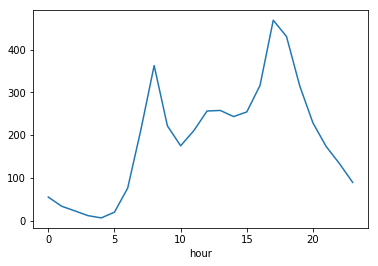

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

El gráfico  muestra dos picos claros, que corresponden a las horas punta de la mañana y la tarde, esto sugiere que los alquileres de bicicletas son más populares durante estas horas, lo que probablemente refleja los desplazamientos habituales al trabajo y la escuela por la mañana y el regreso a casa por la tarde

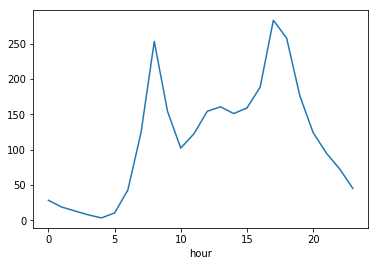

In [8]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos

invierno_bikes = bikes[bikes['season'] == 1]
invierno_bikes.groupby('hour').total.mean().plot()


El grafico muestra cómo cambia el número promedio de alquileres de bicicletas a lo largo de las horas del día durante el invierno, aunque el promedio es mas bajo para esta estación, en el gráfico se observa que hay dos picos, uno por la mañana y otro por la tarde, que son típicos de las horas punta de desplazamiento, estos picos indican los momentos más concurridos para el alquiler de bicicletas y sugieren que incluso en invierno, la gente utiliza bicicletas para ir al trabajo o a la escuela y luego regresar a casa.

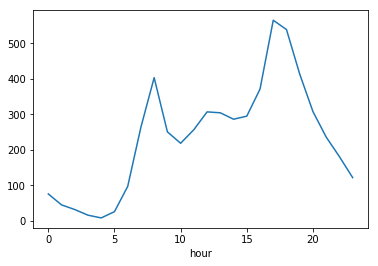

In [9]:
invierno_bikes = bikes[bikes['season'] == 3]
invierno_bikes.groupby('hour').total.mean().plot()

El gráfico muestra la media de alquileres de bicicletas por hora durante la temporada de verano, los picos y valles en el gráfico indicarían los momentos del día con más y menos actividad de alquiler, respectivamente. Dado que el gráfico muestra valores más altos en comparación con los datos de invierno, esto sugiere que hay un mayor uso de bicicletas en el verano, lo cual es esperable debido al clima más cálido y agradable durante esta estación.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Cargar datos
url = 'https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour

# convertimos 'season' a variables dummy para tratarla como categorica
# 'hour' se deja como numerica.
bikes = pd.get_dummies(bikes, columns=['season'], drop_first=True)

# definimos nuestras variables predictoras y de respuesta.
X = bikes[['hour', 'season_2', 'season_3', 'season_4']]
y = bikes['total']

# dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inicializamos y ajustamos el modelo con el conjunto de entrenamiento
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# imprimimos los coeficientes.
print('Intercept:', linreg.intercept_)
print('Coefficients:', linreg.coef_)

# Hacemos las predicciones con el conjunto de prueba
y_pred = linreg.predict(X_test)

# Calculamos el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)



Intercept: -5.919547341962186
Coefficients: [ 10.56961908  99.10667072 116.04634     84.944802  ]
RMSE: 159.40489484006002


Los coeficientes se interpretan como el cambio en la variable de respuesta por cada unidad de cambio en la variable predictora correspondiente, manteniendo todas las otras constantes.

El primer coeficiente, 10.56, corresponde al cambio en la cantidad de bicicletas rentadas por cada hora adicional en el día. Por cada hora adicional, puedes esperar, en promedio, 10.56 bicicletas rentadas adicionales.

El segundo coeficiente, 99.10, sugiere que, en comparación con la categoría de referencia (el invierno, que está implícito y no tiene su propia dummy en este caso), la temporada de primavera (season_2) ve un aumento promedio de 99.10 en el número de bicicletas rentadas.

El tercer coeficiente, 116.04, indica que el verano (season_3) ve un aumento promedio de 116.04 bicicletas rentadas en comparación con la categoría de referencia (invierno).

El cuarto coeficiente, 84.94, muestra que el otoño (season_4) ve un aumento promedio de 84.94 bicicletas rentadas en comparación con la categoría de referencia

Limitaciones:

Estos coeficientes son promedios y no capturan la variabilidad individual o interacciones potenciales entre variables.

La regresión lineal asume que las relaciones son lineales, lo que puede no ser cierto en la práctica,  podría haber horas del día en las que el número de bicicletas rentadas no aumenta linealmente.
El modelo podría estar sobresimplificado y no tener en cuenta otros factores que pueden influir en el número de bicicletas rentadas, como el clima o el día de la semana.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [11]:
# Celda 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


url = 'https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)
bikes.rename(columns={'count':'total'}, inplace=True)
bikes['hour'] = bikes.index.hour

# convertir 'season' a tipo 'categorical' para tratarla de este modo
bikes['season'] = bikes['season'].astype('category')

# Preparar los datos para el modelo
X = bikes[['hour', 'season']]
y = bikes['total']


In [12]:
from sklearn.model_selection import cross_val_score

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
rmse_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    reg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    mse_scores = cross_val_score(reg, X, y, cv=10, scoring='neg_mean_squared_error')
    # Convierte de MSE negativo a RMSE positivo
    rmse_scores.append(np.mean(np.sqrt(-mse_scores)))

# El mejor RMSE
best_depth = np.argmin(rmse_scores) + 1  # +1 porque los índices en Python comienzan en 0
best_rmse = rmse_scores[best_depth - 1]

print("Mejor profundidad:", best_depth)
print("Mejor RMSE:", best_rmse)

Mejor profundidad: 6
Mejor RMSE: 121.94259382561488


In [13]:
rmse_scores

[150.58047729549764,
 151.26076616823033,
 142.81500728739763,
 133.98468138783147,
 130.40018956802126,
 121.94259382561488,
 125.97083102000511,
 127.99666727710868,
 128.01573093830402,
 128.118351121229,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675,
 128.11794701248675]

Text(0,0.5,'Accuracy')

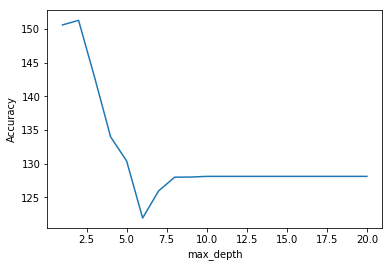

In [14]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, rmse_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [15]:
# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inicializar el modelo de arbol de decisión con el mejor max_depth encontrado
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42)

# entrenar el modelo
tree_reg.fit(X_train, y_train)

# predecir con el conjunto de prueba
y_pred = tree_reg.predict(X_test)

# calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# desempeño del modelo
rmse

116.87040294872779

Comparando los RMSE de ambos modelos, el arbol de decision parece ser un mejor modelo para este conjunto de datos, ya que tiene un RMSE más bajo y, por lo tanto, menos errores en las predicciones. Esto podría deberse a la capacidad del arbol de decisión para capturar relaciones no lineales y las interacciones entre las variables que un modelo de regresión lineal no puede

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [16]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()
df.shape

(6000, 61)

In [17]:
pd.set_option('display.max_rows', 100)

valores_nulos_por_columna = df.isnull().sum()
print(valores_nulos_por_columna)

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

In [18]:
tipos=df.dtypes
print(tipos)

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

In [19]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [20]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [21]:
# Conteo de la frecuencia de cada clase en la variable objetivo
class_counts = y.value_counts()
print(class_counts)

1    3000
0    3000
Name: Popular, dtype: int64


In [22]:
# Celda 6

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score


#calibracion arboles de desicion
# lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # definicion del árbol de decisión 
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

# mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6353333333333333, 2)

Para el arbol de desicion la mejor profundidad es es 2

In [23]:
accuracy_scores

[0.6353333333333333,
 0.6353333333333333,
 0.6328333333333334,
 0.6318333333333335,
 0.625,
 0.6223333333333334,
 0.6151666666666668,
 0.6073333333333334,
 0.5986666666666667,
 0.5904999999999999,
 0.5861666666666667,
 0.5828333333333333,
 0.5775,
 0.5721666666666667,
 0.5726666666666667,
 0.5721666666666667,
 0.5706666666666667,
 0.5721666666666666,
 0.5688333333333333,
 0.5603333333333331]

In [24]:


# inicializar los modelos con parámetros por defecto
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=1)
logreg_clf = LogisticRegression(random_state=1)

# entrenar modelos
tree_clf.fit(X_train, y_train)
logreg_clf.fit(X_train, y_train)

# hacer predicciones 
y_pred_tree = tree_clf.predict(X_test)
y_pred_logreg = logreg_clf.predict(X_test)

# calcular metricas para el arbol de decision
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# calcular metricas para la regresion logistica
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

(accuracy_tree, f1_tree), (accuracy_logreg, f1_logreg)

((0.6453333333333333, 0.6448598130841121), (0.614, 0.6106254203093476))


Se pude decir de lo anterior que para el arbol de decisión, el accuracy o precision es aproximadamente 0.645 y la puntuación F1 es alrededor de 0.645. Para la regresión logística, el accuracy o presicion es aproximadamente 0.614 y la puntuación F1 es cercana a 0.610

Estos resultados sugieren que el árbol de decisión tiene un desempeño ligeramente mejor tanto en precisión como en puntuación F1, esto puede deberse a la capacidad del arbol de decisión de capturar mejor las relaciones no lineales entre las características y la variable objetivo. Por ultimo ambos modelos tienen un desempeño moderado.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [25]:
# Creación de 300 muestras de bootstrap
n_estimators = 300
np.random.seed(123)

n_samples = X_train.shape[0]
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]
samples

[array([3582, 3454, 1346, ..., 2409, 3823,  992]),
 array([ 554, 1524, 1802, ..., 1314,  549, 1303]),
 array([3259,  595,  126, ...,  246, 2641,  580]),
 array([ 918, 1126,  281, ..., 3702, 2706, 2033]),
 array([1803, 3967,  531, ..., 2444, 1572, 3130]),
 array([1128, 3182, 4095, ..., 2716, 2418, 3709]),
 array([1745, 2778, 1040, ..., 1783, 3083, 1198]),
 array([2626, 1128,   88, ..., 1329,  505, 2690]),
 array([3135,   69, 3069, ..., 1821, 1977, 2603]),
 array([2047, 1710,  383, ..., 3887, 2554, 1343]),
 array([4403, 4011, 2930, ..., 2299,  851, 3847]),
 array([ 823, 2283, 1332, ..., 2728, 4452, 1079]),
 array([ 973, 3775, 4336, ..., 1340,   79, 1447]),
 array([ 116, 2089, 3768, ..., 3581, 2923, 1962]),
 array([1320, 3067, 3040, ...,  812, 2636, 3730]),
 array([2392, 3749, 3394, ..., 3691, 2789,  394]),
 array([4494, 2590, 2980, ..., 4198,   57, 3783]),
 array([ 507, 4234,  246, ..., 1597, 4450, 2199]),
 array([3410, 4243,  402, ..., 1381, 3379, 2753]),
 array([2762, 4454, 2143, ..., 

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

samples_clf1=samples[0:100]
samples_clf2=samples[100:200]
samples_clf=samples[200:300]

# Definición del modelo usando DecisionTreeRegressor de sklearn
arbol_clf1 = DecisionTreeClassifier(max_depth=4, random_state=1)
arbol_clf2 = DecisionTreeClassifier(min_samples_leaf=6, random_state=1)
reglog_clf = LogisticRegression(random_state=1)

trees_clf1 = {}
trees_clf2 = {}
trees_clf = {}
for i in range(len(samples_clf1)):
    trees_clf1[i] = DecisionTreeClassifier(max_depth=4, random_state=seeds[i])
    trees_clf1[i].fit(X_train.iloc[samples_clf1[i]], y_train.iloc[samples_clf1[i]])

for i in range(len(samples_clf2)):
    trees_clf2[i] = DecisionTreeClassifier(min_samples_leaf=6, random_state=seeds[i])
    trees_clf2[i].fit(X_train.iloc[samples_clf2[i]], y_train.iloc[samples_clf2[i]])

for i in range(len(samples_clf)):
    trees_clf[i] = LogisticRegression(random_state=seeds[i])
    trees_clf[i].fit(X_train.iloc[samples_clf[i]], y_train.iloc[samples_clf[i]])


In [30]:
trees_clf1

{0: DecisionTreeClassifier(max_depth=4, random_state=3583),
 1: DecisionTreeClassifier(max_depth=4, random_state=1347),
 2: DecisionTreeClassifier(max_depth=4, random_state=5219),
 3: DecisionTreeClassifier(max_depth=4, random_state=7764),
 4: DecisionTreeClassifier(max_depth=4, random_state=9786),
 5: DecisionTreeClassifier(max_depth=4, random_state=7383),
 6: DecisionTreeClassifier(max_depth=4, random_state=5858),
 7: DecisionTreeClassifier(max_depth=4, random_state=97),
 8: DecisionTreeClassifier(max_depth=4, random_state=6258),
 9: DecisionTreeClassifier(max_depth=4, random_state=6783),
 10: DecisionTreeClassifier(max_depth=4, random_state=4144),
 11: DecisionTreeClassifier(max_depth=4, random_state=4170),
 12: DecisionTreeClassifier(max_depth=4, random_state=5665),
 13: DecisionTreeClassifier(max_depth=4, random_state=943),
 14: DecisionTreeClassifier(max_depth=4, random_state=6369),
 15: DecisionTreeClassifier(max_depth=4, random_state=112),
 16: DecisionTreeClassifier(max_depth=

In [27]:
# Predicción para los datos del set de test con cada modelo
y_pred_clf1 = pd.DataFrame(index=X_test.index, columns=list(range(len(samples_clf1))))
for i in range(len(samples_clf1)):
    y_pred_clf1.iloc[:, i] = trees_clf1[i].predict(X_test)

y_pred_clf2 = pd.DataFrame(index=X_test.index, columns=list(range(len(samples_clf2))))
for i in range(len(samples_clf2)):
    y_pred_clf2.iloc[:, i] = trees_clf2[i].predict(X_test)

y_pred_clf = pd.DataFrame(index=X_test.index, columns=list(range(len(samples_clf))))
for i in range(len(samples_clf)):
    y_pred_clf.iloc[:, i] = trees_clf[i].predict(X_test)


In [28]:
y_pred_clf1.sum(axis=1)[:10]

1483    100
2185     89
2520     94
3721     94
3727      5
4524     66
234       4
4735     11
5839     34
2939     57
dtype: int64

In [29]:
y_pred_clf2.sum(axis=1)[:10]

1483    76
2185    64
2520    56
3721    65
3727    25
4524    55
234     17
4735    41
5839    46
2939    49
dtype: int64

In [30]:
y_pred_clf.sum(axis=1)[:10]

1483    100
2185     52
2520    100
3721    100
3727      2
4524    100
234       0
4735      0
5839     52
2939    100
dtype: int64

In [31]:
y_pred_clf1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,1,1,1
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_pred_clf2.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,0,1,0,1,1,0,1,...,1,1,1,1,1,0,1,1,0,1
2185,1,0,1,0,0,0,1,0,1,0,...,0,0,1,1,1,1,0,0,1,0
2520,1,0,1,1,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,1,1
3721,1,0,1,0,0,0,1,1,0,1,...,1,0,1,1,0,0,0,1,1,0
3727,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1


In [33]:
y_pred_clf.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1483,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,0,1,1,0,1,1,1,0,1,1,...,0,1,1,0,1,1,0,0,0,0
2520,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Votación mayoritaria primer modelo
y_pred_clf1 = (y_pred_clf1.sum(axis=1) >= (len(samples_clf1) / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred_clf1, y_test)

0.6427118644067796

In [35]:
metrics.accuracy_score(y_pred_clf1, y_test)

0.6486666666666666

In [36]:
# Votación mayoritaria segundo modelo
y_pred_clf2 = (y_pred_clf2.sum(axis=1) >= (len(samples_clf2) / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred_clf2, y_test)

0.6472184531886024

In [44]:
metrics.accuracy_score(y_pred_clf2, y_test)

0.6533333333333333

In [37]:
# Votación mayoritaria tercer modelo modelo
y_pred_clf = (y_pred_clf.sum(axis=1) >= (len(samples_clf) / 2)).astype(np.int)

# Desempeño al hacer votación mayoritaria
from sklearn import metrics
metrics.f1_score(y_pred_clf, y_test)

0.6120514556533515

In [38]:
metrics.accuracy_score(y_pred_clf1, y_test)

0.6486666666666666

In [39]:
#ensamble de los 3 modelos
# Convertir las series en dataFrames
y_pred_clf1_df = y_pred_clf1.to_frame(name='model1')
y_pred_clf2_df = y_pred_clf2.to_frame(name='model2')
y_pred_clf_df = y_pred_clf.to_frame(name='model3')

# Concatenar 
todo_preds_df = pd.concat([y_pred_clf1_df, y_pred_clf2_df, y_pred_clf_df], axis=1)
todo_preds_df

#todos los modelos concatenados como dataframe
majority_vote = todo_preds_df.mode(axis=1)[0]

# Ahora majority_vote contiene la votación mayoritaria para cada observación

# Evalúa el rendimiento de la votación mayoritaria
final_accuracy = metrics.accuracy_score(y_test, majority_vote)
final_f1_score = metrics.f1_score(y_test, majority_vote)

print(f"Accuracy de la votación mayoritaria: {final_accuracy}")
print(f"F1 Score de la votación mayoritaria: {final_f1_score}")

Accuracy de la votación mayoritaria: 0.6493333333333333
F1 Score de la votación mayoritaria: 0.6426630434782609


para cada uno de los modelos individuales, vemos que el arbol de decision con max_depth de 4, el árbol de decisión con min_samples_leaf de 6, y la regresión logística tienen valores similares tanto en la métrica de Accuracy como en F1-Score. Estos resultados indican un rendimiento moderado, y se destaca que ninguno de los modelos supera de manera significativa a los otros en cuanto a las métricas utilizadas. p

cuando realizamos el ensamblado de los tres modelos mediante votación mayoritaria, observamos que el rendimiento general no mejora significativamente al del mejor modelo individual, esto puede deberse a que la votación mayoritaria no siempre mejora el rendimiento, especialmente si los modelos individuales ya tienen un rendimiento similar y no hay una gran disparidad entre ellos. En resumen, la votación mayoritaria en este caso no ha mejorado el rendimiento.

In [45]:
#otra forma para el punto 7

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# inicializar los modelos con los parámetros elegidos
arbol_clf1 = DecisionTreeClassifier(max_depth=4, random_state=1)
arbol_clf2 = DecisionTreeClassifier(min_samples_leaf=6, random_state=1)
logreg_clf = LogisticRegression(random_state=1)

# crear 300 estimadores basados en los parámetros anteriores
estimators = [('arbol_clf1_' + str(i), DecisionTreeClassifier(max_depth=4, random_state=i)) for i in range(1, 101)] + \
             [('arbol_clf2_' + str(i), DecisionTreeClassifier(min_samples_leaf=6, random_state=i)) for i in range(101, 201)] + \
             [('logreg_clf_' + str(i), LogisticRegression(random_state=i)) for i in range(201, 301)]

# vrear el ensamble de votacion mayoritaria
ensemble_clf = VotingClassifier(estimators=estimators, voting='hard')

# entrenar los modelos
ensemble_clf.fit(X_train, y_train)

# hacer predicciones
y_pred_ensemble = ensemble_clf.predict(X_test)

# calcular métricas para el ensamble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)

# evaluar cada uno de los tres modelos independientemente
arbol_clf1.fit(X_train, y_train)
arbol_clf2.fit(X_train, y_train)
logreg_clf.fit(X_train, y_train)

y_pred_tree1 = arbol_clf1.predict(X_test)
y_pred_tree2 = arbol_clf2.predict(X_test)
y_pred_logreg = logreg_clf.predict(X_test)

accuracy_tree1 = accuracy_score(y_test, y_pred_tree1)
f1_tree1 = f1_score(y_test, y_pred_tree1)

accuracy_tree2 = accuracy_score(y_test, y_pred_tree2)
f1_tree2 = f1_score(y_test, y_pred_tree2)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Mostrar los resultados
print("Desempeño del árbol de decisión con max_depth:")
print("Accuracy:", accuracy_tree1)
print("F1 Score:", f1_tree1)

print("\nDesempeño del árbol de decisión con min_samples_leaf:")
print("Accuracy:", accuracy_tree2)
print("F1 Score:", f1_tree2)

print("\nDesempeño de la regresión logística:")
print("Accuracy:", accuracy_logreg)
print("F1 Score:", f1_logreg)

print("\nDesempeño del ensamble de modelos:")
print("Accuracy del ensamble:", accuracy_ensemble)
print("F1 Score del ensamble:", f1_ensemble)

Desempeño del árbol de decisión con max_depth:
Accuracy: 0.6513333333333333
F1 Score: 0.6345213137665969

Desempeño del árbol de decisión con min_samples_leaf:
Accuracy: 0.548
F1 Score: 0.5527704485488126

Desempeño de la regresión logística:
Accuracy: 0.614
F1 Score: 0.6106254203093476

Desempeño del ensamble de modelos:
Accuracy del ensamble: 0.6326666666666667
F1 Score del ensamble: 0.6238907849829352





Árbol de decisión modelo con max depth configurado en 4

Accuracy: aproximadamente el 65.13% de las predicciones son correctas.
F1 Score: es de aproximadamente 0.63, lo que indica una precisión y una recuperación moderadamente buenas.

Árbol de decisión con min_samples_leaf en 6:

Accuracy: solo el 54.8% de las predicciones son correctas, lo cual es bastante bajo comparado con el primer árbol.
F1 Score: La puntuación F1 es de aproximadamente 0.55, lo que sugiere un equilibrio entre la precisión y la recuperación más bajo que el primer árbol

Regresión logística:

Accuracy: alrededor del 61.4% de las predicciones son correctas, lo que es mejor que el segundo árbol, pero peor que el primer árbol.
F1 Score: la puntuación F1 es de aproximadamente 0.61, que es similar al F1 del primer árbol pero con una exactitud ligeramente menor.


Ensamble de modelos:

Accuracy: Aproximadamente el 63.27% de las predicciones son correctas, lo que es mejor que la regresión logística y el segundo árbol, pero no mejora la precisión del primer árbol

F1 Score: La puntuación F1 es de aproximadamente 0.62, que es comparable al F1 del primer árbol, pero la precisión es un poco más baja

En resumen, el árbol de decisión con la profundidad máxima parece ser el modelo más fuerte por sí solo en términos de precisión y F1, el ensamble no logra superar al árbol con max_depth en cuanto a precisión, pero mejora ligeramente el rendimiento en comparación con la regresión logística y el segundo árbol, este resultado puede indicar que el ensamble no esta optimizado o que los modelos individuales no son lo suficientemente diversos como para aprovechar la fuerza del ensamble.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# inicializar los modelos con los parametros elegidos
arbolp_clf1 = DecisionTreeClassifier(max_depth=4, random_state=1)
arbolp_clf2 = DecisionTreeClassifier(min_samples_leaf=6, random_state=1)
logregp_clf = LogisticRegression(random_state=1)

# crear 300 estimadores basados en los parámetros anteriores
estimators = [('arbolp_clf1_' + str(i), DecisionTreeClassifier(max_depth=4, random_state=i)) for i in range(1, 101)] + \
             [('arbolp_clf2_' + str(i), DecisionTreeClassifier(min_samples_leaf=6, random_state=i)) for i in range(101, 201)] + \
             [('logregp_clf_' + str(i), LogisticRegression(random_state=i)) for i in range(201, 301)]

# rear el ensamble con votación ponderada
ensemble_clfp = VotingClassifier(estimators=estimators, voting='soft')


# entrenar los modelos
ensemble_clfp.fit(X_train, y_train)

# hacer predicciones
y_pred_ensemblep = ensemble_clfp.predict(X_test)

# calcular métricas para el ensamble
accuracy_ensemblep = accuracy_score(y_test, y_pred_ensemblep)
f1_ensemblep = f1_score(y_test, y_pred_ensemblep)

# evaluar cada uno de los tres modelos independientemente
arbolp_clf1.fit(X_train, y_train)
arbolp_clf2.fit(X_train, y_train)
logregp_clf.fit(X_train, y_train)

y_pred_arbol1p = arbolp_clf1.predict(X_test)
y_pred_arbol2p = arbolp_clf2.predict(X_test)
y_pred_logregp = logregp_clf.predict(X_test)

accuracy_arbol1p = accuracy_score(y_test, y_pred_arbol1p)
f1_arbol1p = f1_score(y_test, y_pred_arbol1p)

accuracy_arbol2p = accuracy_score(y_test, y_pred_arbol2p)
f1_arbol2p = f1_score(y_test, y_pred_arbol2p)

accuracy_logregp = accuracy_score(y_test, y_pred_logregp)
f1_logregp = f1_score(y_test, y_pred_logregp)

# Mostrar los resultados
print("Desempeño del árbol de decisión con max_depth:")
print("Accuracy:", accuracy_arbol1p)
print("F1 Score:", f1_arbol1p)

print("\nDesempeño del árbol de decisión con min_samples_leaf:")
print("Accuracy:", accuracy_arbol2p)
print("F1 Score:", f1_arbol2p)

print("\nDesempeño de la regresión logística:")
print("Accuracy:", accuracy_logregp)
print("F1 Score:", f1_logregp)

print("\nDesempeño del ensamble de modelos:")
print("Accuracy del ensamble:", accuracy_ensemblep)
print("F1 Score del ensamble:", f1_ensemblep)

Desempeño del árbol de decisión con max_depth:
Accuracy: 0.6513333333333333
F1 Score: 0.6345213137665969

Desempeño del árbol de decisión con min_samples_leaf:
Accuracy: 0.548
F1 Score: 0.5527704485488126

Desempeño de la regresión logística:
Accuracy: 0.614
F1 Score: 0.6106254203093476

Desempeño del ensamble de modelos:
Accuracy del ensamble: 0.584
F1 Score del ensamble: 0.592156862745098


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

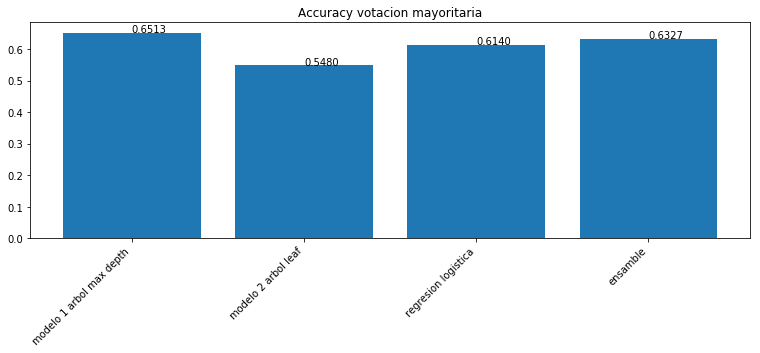

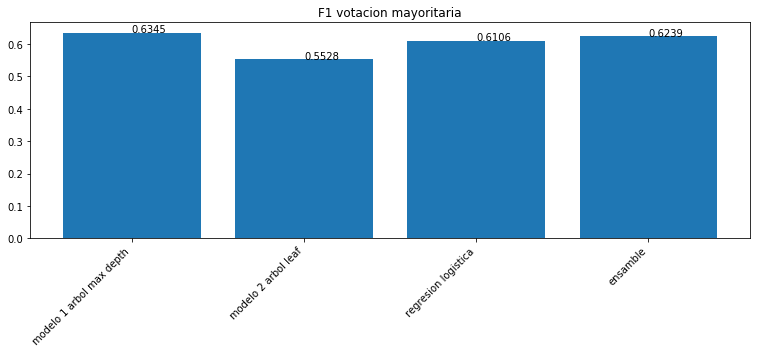

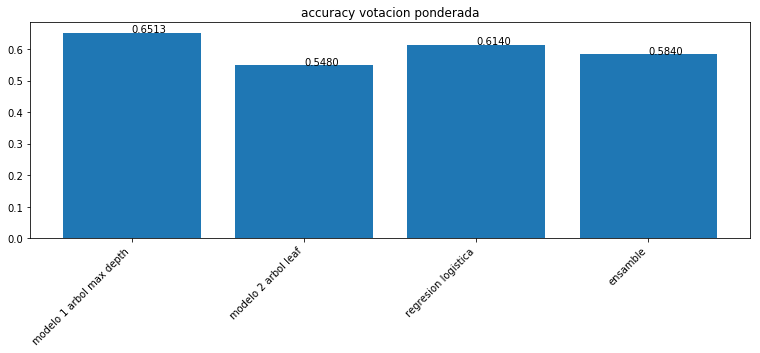

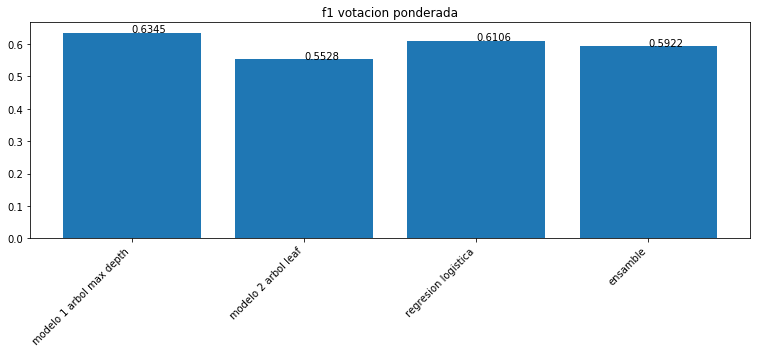

In [50]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Accuracy votacion mayoritaria")
ejeX = ['modelo 1 arbol max depth','modelo 2 arbol leaf', 'regresion logistica', 'ensamble']
ejeY = [accuracy_tree1, accuracy_tree2, accuracy_logreg, accuracy_ensemble]
ax.bar(ejeX,ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f'{y[i]:.4f}')  # Aquí se formatean los decimales

#  llamar a la función modificada
addlabels(ejeX, ejeY, plt)
ax.set_xticks(range(len(ejeX)))
ax.set_xticklabels(ejeX, rotation=45, ha='right')
plt.show()

fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("F1 votacion mayoritaria")
ejeX = ['modelo 1 arbol max depth','modelo 2 arbol leaf', 'regresion logistica', 'ensamble']
ejeY = [ f1_tree1, f1_tree2,  f1_logreg, f1_ensemble]
ax.bar(ejeX,ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f'{y[i]:.4f}')  # Aquí se formatean los decimales

#  llamar a la función modificada
addlabels(ejeX, ejeY, plt)
ax.set_xticks(range(len(ejeX)))
ax.set_xticklabels(ejeX, rotation=45, ha='right')
plt.show()

fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("accuracy votacion ponderada")
ejeX = ['modelo 1 arbol max depth','modelo 2 arbol leaf', 'regresion logistica', 'ensamble']
ejeY = [ accuracy_arbol1p, accuracy_arbol2p,  accuracy_logregp, accuracy_ensemblep]
ax.bar(ejeX,ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f'{y[i]:.4f}')  # Aquí se formatean los decimales

#  llamar a la función modificada
addlabels(ejeX, ejeY, plt)
ax.set_xticks(range(len(ejeX)))
ax.set_xticklabels(ejeX, rotation=45, ha='right')
plt.show()

fig = plt.figure(figsize=(10,3))
ax = fig.add_axes([0,0,1,1])
ax.set_title("f1 votacion ponderada")
ejeX = ['modelo 1 arbol max depth','modelo 2 arbol leaf', 'regresion logistica', 'ensamble']
ejeY = [ f1_arbol1p, f1_arbol2p,  f1_logregp, f1_ensemblep]
ax.bar(ejeX,ejeY)
def addlabels(x, y, plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], f'{y[i]:.4f}')  # Aquí se formatean los decimales

#  llamar a la función modificada
addlabels(ejeX, ejeY, plt)
ax.set_xticks(range(len(ejeX)))
ax.set_xticklabels(ejeX, rotation=45, ha='right')
plt.show()


votacionmMayoritaria: Tiene una precisión (Accuracy) ligeramente mayor y una puntuación F1 (F1 Score) también más alta que la votación ponderada. Esto indica que, en general, el ensamble de votación mayoritaria podría estar realizando mejor las predicciones correctas.

votación ponderada: Muestra una precisión y puntuación F1 más bajas en comparación con la votación mayoritaria. Esto podría indicar que los pesos asignados a los modelos en el ensamble de votación ponderada no están mejorando el rendimiento y podría ser necesario un ajuste de los mismos.

Las ventajas de la votación mayoritaria incluyen su simplicidad y la tendencia a ser robusta, ya que cada modelo tiene igual peso en la decisión final. Sin embargo, esta metodología no considera el rendimiento individual de los modelos y podría no ser óptima si algunos modelos son significativamente mejores que otros.

La votación ponderada permite asignar más influencia a los modelos con mejor rendimiento, lo que en teoría podría mejorar la precisión del ensamble. Pero si los pesos no se eligen cuidadosamente, el rendimiento podría no ser mejor que el de una votación mayoritaria y podría incluso ser peor, como parece ser el caso basado en tus resultados.

